In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/archived_data/archived_time_series/time_series_19-covid-Deaths_archived_0325.csv")
recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/archived_data/archived_time_series/time_series_19-covid-Recovered_archived_0325.csv")
confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/archived_data/archived_time_series/time_series_19-covid-Confirmed_archived_0325.csv")


In [3]:
confirmed.set_index('Country/Region').loc['China'].head()

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
China,Hubei,30.9756,112.2707,444,444,549,761,1058,1423,3554,...,67790,67794,67798,67799,67800,67800,67800,67800,67800,67800.0
China,Guangdong,23.3417,113.4244,26,32,53,78,111,151,207,...,1356,1360,1361,1364,1370,1378,1395,1400,1407,1413.0
China,Henan,33.8820,113.6140,5,5,9,32,83,128,168,...,1273,1273,1273,1273,1273,1273,1273,1273,1273,1274.0
China,Zhejiang,29.1832,120.0934,10,27,43,62,104,128,173,...,1227,1231,1231,1232,1232,1233,1234,1236,1237,1238.0
China,Hunan,27.6104,111.7088,4,9,24,43,69,100,143,...,1018,1018,1018,1018,1018,1018,1018,1018,1018,1018.0


In [4]:
def latest_by_country(data):
  return data.groupby('Country/Region').sum().iloc[:,-1]

latest_by_country(confirmed)

<ipython-input-4-dc730fb3337b>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return data.groupby('Country/Region').sum().iloc[:,-1]


Country/Region
Afghanistan     40.0
Albania         89.0
Algeria        201.0
Andorra        113.0
Angola           2.0
               ...  
Uzbekistan      43.0
Venezuela       70.0
Vietnam        113.0
Zambia           3.0
Zimbabwe         3.0
Name: 3/23/20, Length: 183, dtype: float64

In [5]:
informations = [latest_by_country(confirmed),latest_by_country(recovered),latest_by_country(deaths)]
combined = pd.concat(informations, axis =1)
combined.columns = ['confirmed','deaths','recovered']

<ipython-input-4-dc730fb3337b>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return data.groupby('Country/Region').sum().iloc[:,-1]
<ipython-input-4-dc730fb3337b>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return data.groupby('Country/Region').sum().iloc[:,-1]
<ipython-input-4-dc730fb3337b>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return data.groupby('Country/Region').sum().iloc[:,-1]


In [6]:
# tail() quer dizer os ultimos
confirmed.set_index('Country/Region').loc['China'].sum().tail()

3/19/20      81156
3/20/20      81250
3/21/20      81305
3/22/20      81397
3/23/20    81439.0
dtype: object

In [7]:
is_mainland = confirmed['Country/Region'] == 'China'
is_mainland.head()

0    False
1    False
2    False
3    False
4    False
Name: Country/Region, dtype: bool

In [8]:
confirmed['is_mainland_china'] = is_mainland
display(confirmed.head())
display(confirmed.tail())

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,is_mainland_china
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,114,147,177,212,272,322,411,599,599.0,False
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,839,825,878,889,924,963,1007,1086,1086.0,False
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,226,243,266,313,345,385,432,455,455.0,False
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,2,2.0,False
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,428,566,673,790,900,1030,1183,1306,1306.0,False


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,is_mainland_china
496,NaN,Jersey,49.1900,-2.110,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,False
497,NaN,Puerto Rico,18.2000,-66.500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,False
498,NaN,Republic of the Congo,-1.4400,15.556,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,False
499,NaN,The Bahamas,24.2500,-76.000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,False
500,NaN,The Gambia,13.4667,-16.600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,False


In [9]:
confirmed.query('is_mainland_china==True')

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,is_mainland_china
154,Hubei,China,30.9756,112.2707,444,444,549,761,1058,1423,...,67794,67798,67799,67800,67800,67800,67800,67800,67800.0,True
158,Guangdong,China,23.3417,113.4244,26,32,53,78,111,151,...,1360,1361,1364,1370,1378,1395,1400,1407,1413.0,True
159,Henan,China,33.8820,113.6140,5,5,9,32,83,128,...,1273,1273,1273,1273,1273,1273,1273,1273,1274.0,True
160,Zhejiang,China,29.1832,120.0934,10,27,43,62,104,128,...,1231,1231,1232,1232,1233,1234,1236,1237,1238.0,True
161,Hunan,China,27.6104,111.7088,4,9,24,43,69,100,...,1018,1018,1018,1018,1018,1018,1018,1018,1018.0,True
162,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,...,990,990,990,990,990,990,990,990,990.0,True
163,Jiangxi,China,27.6140,115.7221,2,7,18,18,36,72,...,935,935,935,935,935,935,935,936,936.0,True
164,Shandong,China,36.3427,118.1498,2,6,15,27,46,75,...,760,760,761,761,761,762,764,766,767.0,True
166,Jiangsu,China,32.9711,119.4550,1,5,9,18,33,47,...,631,631,631,631,631,631,631,633,633.0,True
167,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,...,576,576,576,576,576,576,576,577,577.0,True


In [10]:
confirmed.groupby('is_mainland_china').sum()

<ipython-input-10-98690a48bcfa>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  confirmed.groupby('is_mainland_china').sum()


,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
is_mainland_china,,,,,,,,,,,,,,,,,,,,,
False,14089.8353,-20266.3987,7,10,21,28,43,50,69,79,...,75117,86443,100494,116084,133808,161552,190916,223219,254558,254565.0
True,1083.3367,3684.4197,548,643,920,1406,2075,2877,5509,6087,...,80977,81003,81033,81058,81102,81156,81250,81305,81397,81439.0


<ipython-input-11-d6a116e4197b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  confirmed.groupby('is_mainland_china').sum()['3/2/20'].plot(kind='pie')


<Axes: ylabel='3/2/20'>

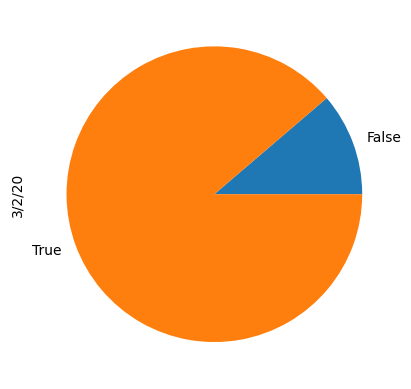

In [11]:
confirmed.groupby('is_mainland_china').sum()['3/2/20'].plot(kind='pie')

<ipython-input-12-9aa4d622d853>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  confirmed.groupby('is_mainland_china').sum()['3/2/20'].plot(kind='bar')


<Axes: xlabel='is_mainland_china'>

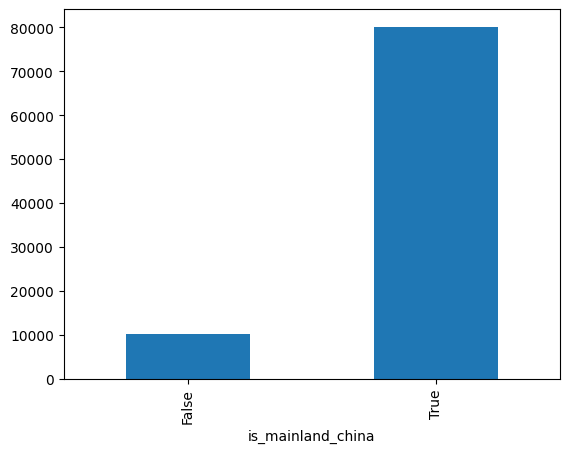

In [12]:
confirmed.groupby('is_mainland_china').sum()['3/2/20'].plot(kind='bar')

No dia 02/03/2020 aminland china tinha 8 vezes o número de casos que o resto.

In [13]:
np.where(confirmed['is_mainland_china'],'China','Others')

array(['Others', 'Others', 'Others', 'Others', 'Others', 'Others',
       'Others', 'Others', 'Others', 'Others', 'Others', 'Others',
       'Others', 'Others', 'Others', 'Others', 'Others', 'Others',
       'Others', 'Others', 'Others', 'Others', 'Others', 'Others',
       'Others', 'Others', 'Others', 'Others', 'Others', 'Others',
       'Others', 'Others', 'Others', 'Others', 'Others', 'Others',
       'Others', 'Others', 'Others', 'Others', 'Others', 'Others',
       'Others', 'Others', 'Others', 'Others', 'Others', 'Others',
       'Others', 'Others', 'Others', 'Others', 'Others', 'Others',
       'Others', 'Others', 'Others', 'Others', 'Others', 'Others',
       'Others', 'Others', 'Others', 'Others', 'Others', 'Others',
       'Others', 'Others', 'Others', 'Others', 'Others', 'Others',
       'Others', 'Others', 'Others', 'Others', 'Others', 'Others',
       'Others', 'Others', 'Others', 'Others', 'Others', 'Others',
       'Others', 'Others', 'Others', 'Others', 'Others', 'Othe

In [14]:
confirmed['is_mainland_china_label'] = np.where(confirmed['is_mainland_china'],'China','Others')

In [15]:
confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,is_mainland_china,is_mainland_china_label
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,147,177,212,272,322,411,599,599.0,False,Others
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,825,878,889,924,963,1007,1086,1086.0,False,Others
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,243,266,313,345,385,432,455,455.0,False,Others
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,2,2.0,False,Others
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,566,673,790,900,1030,1183,1306,1306.0,False,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,NaN,Jersey,49.1900,-2.1100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,False,Others
497,NaN,Puerto Rico,18.2000,-66.5000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,False,Others
498,NaN,Republic of the Congo,-1.4400,15.5560,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,False,Others
499,NaN,The Bahamas,24.2500,-76.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,False,Others


<ipython-input-16-131a8d553c0d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  confirmed.groupby('is_mainland_china_label').sum()['3/2/20'].plot(kind='bar')


Text(0.5, 1.0, 'Casos confirmados acumulados até 03/02/2020')

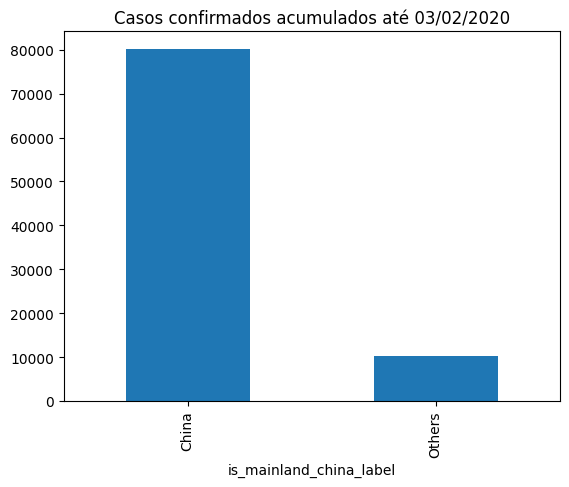

In [16]:
confirmed.groupby('is_mainland_china_label').sum()['3/2/20'].plot(kind='bar')
plt.title('Casos confirmados acumulados até 03/02/2020')

In [17]:
last_date = "3/2/20"

<ipython-input-18-733bd88d44bd>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  summed = confirmed.groupby('is_mainland_china_label').sum()


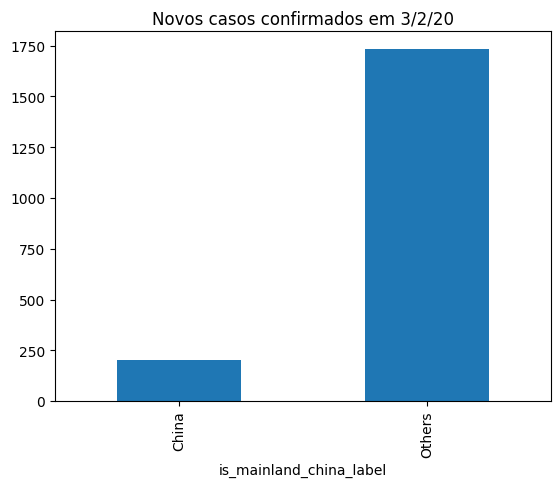

In [18]:
summed = confirmed.groupby('is_mainland_china_label').sum()
summed['delta'] = summed['3/2/20'] - summed['3/1/20']
summed['delta'].plot(kind='bar')
plt.title(f'Novos casos confirmados em {last_date}')
plt.show()

<Axes: xlabel='is_mainland_china_label'>

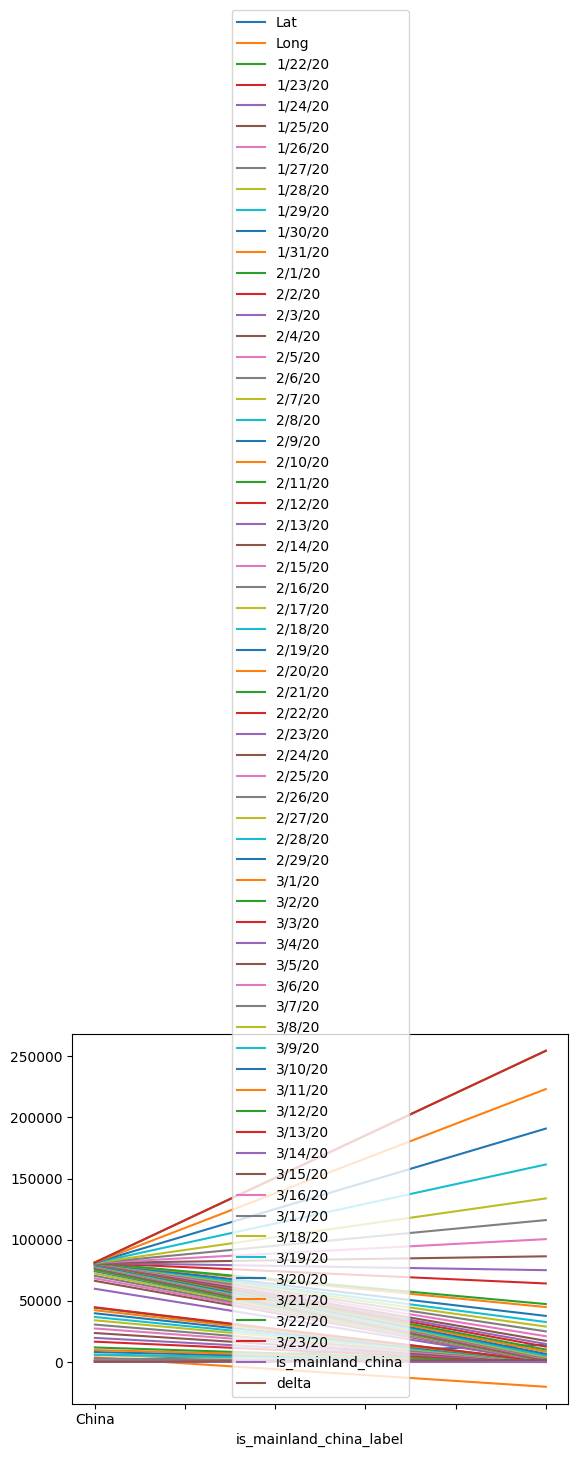

In [19]:
summed.plot()

In [20]:
# rotacionar a tabela a linha vira coluna e a acoluna vira linha
summed.T

is_mainland_china_label,China,Others
Lat,1083.3367,14089.8353
Long,3684.4197,-20266.3987
1/22/20,548.0000,7.0000
1/23/20,643.0000,10.0000
1/24/20,920.0000,21.0000
...,...,...
3/21/20,81305.0000,223219.0000
3/22/20,81397.0000,254558.0000
3/23/20,81439.0000,254565.0000
is_mainland_china,33.0000,0.0000


In [21]:
summed

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,is_mainland_china,delta
is_mainland_china_label,,,,,,,,,,,,,,,,,,,,,
China,1083.3367,3684.4197,548,643,920,1406,2075,2877,5509,6087,...,81033,81058,81102,81156,81250,81305,81397,81439.0,33,204
Others,14089.8353,-20266.3987,7,10,21,28,43,50,69,79,...,100494,116084,133808,161552,190916,223219,254558,254565.0,0,1733


Text(0.5, 1.0, 'Desenvolvimento de casos confirmados com o passar do tempo')

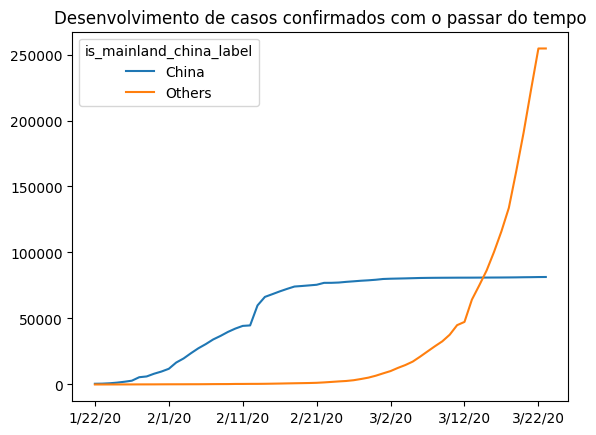

In [22]:
summed.T[2:-2].plot()
plt.title('Desenvolvimento de casos confirmados com o passar do tempo')

Text(0.5, 1.0, 'Casos com o decorrer do tempo')

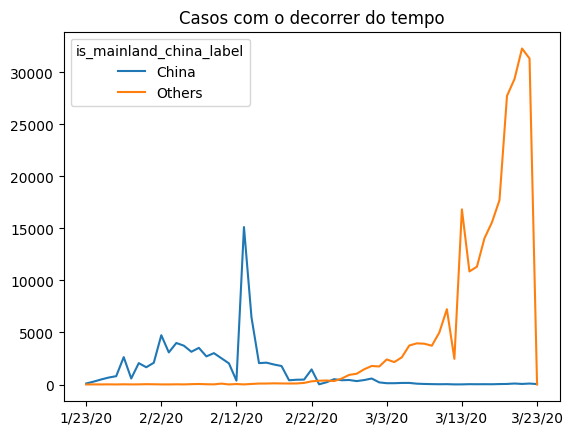

In [23]:
diferencas = summed.T[2:-2].diff().dropna()
diferencas.plot()
plt.title('Casos com o decorrer do tempo')

In [24]:
# números de casos dividido pelo total da população encontra a porcentagem
cases = confirmed.groupby('is_mainland_china_label').sum()[last_date].loc['China']
estimated_population = 1437525528


incidence_rat = cases / estimated_population
display(f'{incidence_rat * 100.:5f}')

# conta péssima, e ruim e errada. pois estou usando uma população muito maior do que deveria estar usando.

<ipython-input-24-3dd2a40c7da6>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cases = confirmed.groupby('is_mainland_china_label').sum()[last_date].loc['China']


'0.005575'

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
link = '/content/drive/MyDrive/Alura_ciencia_e_dados/Datascience/Data_science_analise_para_saude_medicina/WPP2019_TotalPopulationBySex.csv'
un_population = pd.read_csv(link)
# Population estar em milhares

un_population['PopTotal'] = un_population.PopTotal * 1000

In [27]:
un_population.head()

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,4,Afghanistan,2,Medium,1950,1950.5,4099.243,3652.874,7752117.0,11.874
1,4,Afghanistan,2,Medium,1951,1951.5,4134.756,3705.395,7840151.0,12.009
2,4,Afghanistan,2,Medium,1952,1952.5,4174.450,3761.546,7935996.0,12.156
3,4,Afghanistan,2,Medium,1953,1953.5,4218.336,3821.348,8039684.0,12.315
4,4,Afghanistan,2,Medium,1954,1954.5,4266.484,3884.832,8151316.0,12.486


In [28]:
un_population.describe().round(5)

,LocID,VarID,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
count,280932.00000,280932.00000,280932.00000,280932.00000,2.508760e+05,2.508760e+05,2.809320e+05,280932.00000
mean,703.12506,22.41135,2051.02649,2051.52649,2.324362e+05,2.298754e+05,4.128536e+08,426.65904
std,631.95976,55.97285,33.64215,33.64215,6.938837e+05,6.829825e+05,1.308911e+09,2418.99078
min,4.00000,2.00000,1950.00000,1950.50000,6.812000e+00,6.889000e+00,1.510000e+02,0.05200
25%,300.00000,2.00000,2031.00000,2031.50000,1.847834e+03,1.860604e+03,1.240100e+06,34.20525
50%,586.00000,5.00000,2055.00000,2055.50000,1.136849e+04,1.164585e+04,1.420555e+07,91.59000
75%,903.00000,9.00000,2078.00000,2078.50000,8.526402e+04,8.648854e+04,1.171661e+08,216.98575
max,5501.00000,207.00000,2100.00000,2100.50000,1.092000e+07,1.071273e+07,2.163274e+10,56025.83900


In [29]:
un_population.query('Time==2019')

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
69,4,Afghanistan,2,Medium,2019,2019.5,19529.727,18512.030,3.804176e+07,58.269
953,903,Africa,2,Medium,2019,2019.5,653513.680,654550.496,1.308064e+09,44.119
1837,1823,African Group,2,Medium,2019,2019.5,652644.714,653675.858,1.306321e+09,44.464
1988,1560,African Union,2,Medium,2019,2019.5,652949.469,653953.561,1.306903e+09,44.085
2139,2080,African Union: Central Africa,2,Medium,2019,2019.5,76945.498,77068.207,1.540137e+08,29.192
...,...,...,...,...,...,...,...,...,...,...
277314,900,World,2,Medium,2019,2019.5,3889034.611,3824433.594,7.713468e+09,59.291
278198,1801,World Bank Regional Groups (developing only),2,Medium,2019,2019.5,3261387.881,3191129.174,6.452517e+09,70.258
278349,887,Yemen,2,Medium,2019,2019.5,14692.284,14469.638,2.916192e+07,55.234
279233,894,Zambia,2,Medium,2019,2019.5,8843.214,9017.820,1.786103e+07,24.026


In [30]:
un_population[un_population.Location == 'China'].sum()


LocID                                                    137904
Location      ChinaChinaChinaChinaChinaChinaChinaChinaChinaC...
VarID                                                     21888
Variant       MediumMediumMediumMediumMediumMediumMediumMedi...
Time                                                    1815755
MidPeriod                                             1816197.0
PopMale                                           585182634.111
PopFemale                                         560036650.321
PopTotal                                        1145203093953.0
PopDensity                                           121983.102
dtype: object

In [31]:
un_population_total = un_population.query('Time==2019')[['Location','PopTotal']].set_index('Location')
un_population_total.head()

,PopTotal
Location,
Afghanistan,3.804176e+07
Africa,1.308064e+09
African Group,1.306321e+09
African Union,1.306903e+09
African Union: Central Africa,1.540137e+08


In [32]:
# Suponha que você tenha dois DataFrames: df1 e df2
# Vamos supor que ambos têm uma coluna em comum chamada 'key'

import pandas as pd

# Crie dois DataFrames de exemplo
df1 = pd.DataFrame({'key': ['A', 'B', 'C', 'D'],
                    'value': [1, 2, 3, 4]})

df2 = pd.DataFrame({'key': ['B', 'D', 'E', 'F'],
                    'value': [5, 6, 7, 8]})

# Realize o merge dos DataFrames usando a coluna 'key'
merged_df = pd.merge(df1, df2, on='key', how='inner')  # 'inner' é o método padrão, pode ser omitido

# Exiba o DataFrame resultante
print(merged_df)


  key  value_x  value_y
0   B        2        5
1   D        4        6


In [33]:
combined.join(un_population_total)

,confirmed,deaths,recovered,PopTotal
Afghanistan,40.0,1.0,1.0,38041757.0
Albania,89.0,2.0,2.0,2880913.0
Algeria,201.0,65.0,17.0,43053054.0
Andorra,113.0,1.0,1.0,77146.0
Angola,2.0,0.0,0.0,31825299.0
...,...,...,...,...
Uzbekistan,43.0,0.0,0.0,32981715.0
Venezuela,70.0,15.0,0.0,NaN
Vietnam,113.0,17.0,0.0,NaN
Zambia,3.0,0.0,0.0,17861034.0


In [34]:
combined.join(un_population_total).sort_values('confirmed',ascending=False).head(20)

,confirmed,deaths,recovered,PopTotal
China,81439.0,72814.0,3274.0,1.433784e+09
Italy,59138.0,7024.0,5476.0,6.055009e+07
US,33276.0,178.0,417.0,NaN
Spain,28768.0,2575.0,1772.0,4.673678e+07
Germany,24873.0,266.0,94.0,8.351705e+07
Iran,21638.0,7931.0,1685.0,NaN
France,16044.0,2200.0,674.0,6.512973e+07
"Korea, South",8897.0,2909.0,104.0,NaN
Switzerland,7245.0,131.0,98.0,8.591361e+06
United Kingdom,5741.0,67.0,282.0,6.753016e+07


In [35]:
combined_espanded = combined.join(un_population_total).sort_values('confirmed',ascending=False).dropna()
combined_espanded

,confirmed,deaths,recovered,PopTotal
China,81439.0,72814.0,3274.0,1.433784e+09
Italy,59138.0,7024.0,5476.0,6.055009e+07
Spain,28768.0,2575.0,1772.0,4.673678e+07
Germany,24873.0,266.0,94.0,8.351705e+07
France,16044.0,2200.0,674.0,6.512973e+07
...,...,...,...,...
Somalia,1.0,0.0,0.0,1.544291e+07
Djibouti,1.0,0.0,0.0,9.735570e+05
Puerto Rico,0.0,0.0,1.0,2.933404e+06
Greenland,0.0,0.0,0.0,5.666000e+04


In [36]:
un_population.index[:5]

RangeIndex(start=0, stop=5, step=1)

In [37]:
un_population.query("Location.str.contains('China') and Time == 2019", engine ='python')

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
47893,156,China,2,Medium,2019,2019.5,735624.259,698159.433,1.433784e+09,152.722
48777,1105,China (and dependencies),2,Medium,2019,2019.5,751174.575,714459.601,1.465634e+09,155.510
48928,344,"China, Hong Kong SAR",2,Medium,2019,2019.5,3418.487,4017.670,7.436157e+06,7082.054
49812,446,"China, Macao SAR",2,Medium,2019,2019.5,307.706,332.740,6.404460e+05,21419.599
50696,158,"China, Taiwan Province of China",2,Medium,2019,2019.5,11824.123,11949.758,2.377388e+07,671.389
140008,948,"Less developed regions, excluding China",2,Medium,2019,2019.5,2518843.362,2458360.347,4.977204e+09,69.541
208293,2093,"SIDS Atlantic, and Indian Ocean, Mediterranean...",2,Medium,2019,2019.5,8421.200,7569.584,1.599078e+07,37.205


In [38]:
# vou assumir algumas premissas
# estou assumidos que na UN china  =  Jonh Hokpins Mainland China

# def rename_location(location):
#   if location=='China':
#     return 'Mainland China'
#   return location


# un_population_total['location_for_who'] = un_population_total.index.map(rename_location)


In [39]:
un_population_total[un_population_total.index=='China']

,PopTotal
Location,
China,1.433784e+09


In [40]:
un_population_total

,PopTotal
Location,
Afghanistan,3.804176e+07
Africa,1.308064e+09
African Group,1.306321e+09
African Union,1.306903e+09
African Union: Central Africa,1.540137e+08
...,...
World,7.713468e+09
World Bank Regional Groups (developing only),6.452517e+09
Yemen,2.916192e+07


In [41]:
# un_population_total.query('location_for_who=="Mainland China"').head()


In [42]:
# un_population_total = un_population_total.set_index('location_for_who')
# un_population_total

In [43]:
combined.join(un_population_total).sort_values('confirmed', ascending=False)

,confirmed,deaths,recovered,PopTotal
China,81439.0,72814.0,3274.0,1.433784e+09
Italy,59138.0,7024.0,5476.0,6.055009e+07
US,33276.0,178.0,417.0,NaN
Spain,28768.0,2575.0,1772.0,4.673678e+07
Germany,24873.0,266.0,94.0,8.351705e+07
...,...,...,...,...
Puerto Rico,0.0,0.0,1.0,2.933404e+06
Greenland,0.0,0.0,0.0,5.666000e+04
The Bahamas,0.0,0.0,0.0,NaN
Guam,0.0,0.0,1.0,1.672950e+05


In [47]:
combined_expanded = combined.join(un_population_total).sort_values('confirmed', ascending=False).dropna()

In [44]:
combined.query("index=='China'")

,confirmed,deaths,recovered
Country/Region,,,
China,81439.0,72814.0,3274.0


In [45]:
def locate(population, country):
  return un_population.query(f"Location.str.contains('{country}') and Time == 2019", engine ='python')

In [46]:
locate(un_population, 'United States')

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
263406,850,United States Virgin Islands,2,Medium,2019,2019.5,49.704,54.875,104579.0,298.797
264290,840,United States of America,2,Medium,2019,2019.5,162826.299,166238.618,329064917.0,35.974
265174,1111,United States of America (and dependencies),2,Medium,2019,2019.5,164409.733,167972.987,332382720.0,36.295


In [55]:
# o cálculo de incidencia aqui está errado, pois assumi que a a população em risco da China é todo mundo
# mas até agora 83% dos casos estão em Hubei
# Durante esse momento da epidemia é injusto com a localização da china considerar essa incidência.

combined_expanded['incidence_ration'] = (combined_expanded['confirmed'] / combined_expanded['PopTotal']) * 100000
combined_expanded['mortality_ration'] = (combined_expanded['deaths'] / combined_expanded['PopTotal']) * 100000

In [56]:
combined_expanded

,confirmed,deaths,recovered,PopTotal,incidence_ration,mortality_ration
China,81439.0,72814.0,3274.0,1.433784e+09,5.680006,5.078451
Italy,59138.0,7024.0,5476.0,6.055009e+07,97.667895,11.600313
Spain,28768.0,2575.0,1772.0,4.673678e+07,61.553232,5.509579
Germany,24873.0,266.0,94.0,8.351705e+07,29.781944,0.318498
France,16044.0,2200.0,674.0,6.512973e+07,24.633911,3.377874
...,...,...,...,...,...,...
Somalia,1.0,0.0,0.0,1.544291e+07,0.006475,0.000000
Djibouti,1.0,0.0,0.0,9.735570e+05,0.102716,0.000000
Puerto Rico,0.0,0.0,1.0,2.933404e+06,0.000000,0.000000
Greenland,0.0,0.0,0.0,5.666000e+04,0.000000,0.000000


In [54]:
# Comparando com outros virus, com Influenza, em outro pais, como Brasil, em outro estados, como Rio Grande do sul,
# em outro período de 2019, em outro tamanho de período de 1 ano inteiro versus 2 meses.

# Totalmente diferente, qual a chance da comparação ser justa e honesta?
# Fonte:
# https://www.cevs.rs.gov.br/informativos-epidemiologicos-2019

# O coeficiente de incidência entre SRAG está em 3, 88/100.000 habitantes, o coeficiente de mortalidade (CM)
# está em 0,61/100.000 habitantes, enquanto que o CM nacionaç, na SE 46 foi de 0,50/100.000 habitantes. A letalidade no Estado está em 15,8%.


# Parece que, dado o coeficiente de incidencia nos países afetados pelo coronavirus até então, e somente o tempo de 2 meses, além
# da curva de crescimento de casos novos na China e fora da China, parece que existe ainda um triste potencial alto de um coeficiente de incidência
# mais alto que influenza no relatório analisado.

In [57]:
confirmed.sort_values(last_date, ascending = False)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,is_mainland_china,is_mainland_china_label
154,Hubei,China,30.9756,112.2707,444,444,549,761,1058,1423,...,67798,67799,67800,67800,67800,67800,67800,67800.0,True,China
156,NaN,"Korea, South",36.0000,128.0000,1,1,2,2,3,4,...,8236,8320,8413,8565,8652,8799,8897,8897.0,False,Others
16,NaN,Italy,43.0000,12.0000,0,0,0,0,0,0,...,27980,31506,35713,41035,47021,53578,59138,59138.0,False,Others
155,NaN,Iran,32.0000,53.0000,0,0,0,0,0,0,...,14991,16169,17361,18407,19644,20610,21638,21638.0,False,Others
158,Guangdong,China,23.3417,113.4244,26,32,53,78,111,151,...,1361,1364,1370,1378,1395,1400,1407,1413.0,True,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,"Prince George's, MD",US,38.7849,-76.8721,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,False,Others
235,"Loudoun, VA",US,39.0768,-77.6536,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,False,Others
234,"Spotsylvania, VA",US,38.2042,-77.6078,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,False,Others
233,"Arlington, VA",US,38.8816,-77.0910,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,False,Others


In [61]:
confirmed_cases = confirmed.set_index('Province/State').loc['Hubei'][last_date]
death_cases = deaths.set_index('Province/State').loc['Hubei'][last_date]
recovered_cases = recovered.set_index('Province/State').loc['Hubei'][last_date]

letality_rate_1 = death_cases / confirmed_cases * 100
letality_rate_2 = death_cases / (death_cases + recovered_cases) * 100

display(f'Letality rate 1: {letality_rate_1}%')
display(f'Letality rate 1: {letality_rate_2}%')

'Letality rate 1: 4.177160484628109%'

'Letality rate 1: 7.629909900100716%'

In [63]:
# nos estados unidos de acordo com burden report de influenza 2018/2019 estimativa não final
letality_rate_hospitalization = 34157 / 490561 * 100

print(f'Latality rate hospitalização EUA influenza 2018-2019: {letality_rate_hospitalization}')

Latality rate hospitalização EUA influenza 2018-2019: 6.962844579980879


In [66]:
letality_rate_medical_visit = 34157 / 16520350 * 100

print(f'Latality rate visita médica EUA influenza 2018-2019: {letality_rate_medical_visit}')

Latality rate visita médica EUA influenza 2018-2019: 0.20675712076317995


In [67]:
letality_rate_symptomatic = 34157 / 35520883 * 100

print(f'Latality rate sintomáticos EUA influenza 2018-2019: {letality_rate_symptomatic}')

Latality rate sintomáticos EUA influenza 2018-2019: 0.09616033475293956


In [71]:

confirmed_cases = confirmed.set_index('Province/State').loc['Hubei'][last_date]
death_cases = deaths.set_index('Province/State').loc['Hubei'][last_date]
recovered_cases = recovered.set_index('Province/State').loc['Hubei'][last_date]


hubei_population = 59020000
incidence_ratio = confirmed_cases / hubei_population * 100000
mortality_rate = death_cases / hubei_population * 100000

print(f'Coeficiente de incidencia em Hubei {incidence_ratio}')
print(f'Coeficiente de mortalidade em Hubei {mortality_rate}')

Coeficiente de incidencia em Hubei 113.69535750593019
Coeficiente de mortalidade em Hubei 4.749237546594375


In [74]:
# estados unidos, mesmo relatio de buden, coeficiente de incidencia


incidence_ratio = 35520883 / 329450000 * 100000
mortality_rate = 34157 / 329450000 * 100000

print(f'Coeficiente de incidencia de influenza 2018-2019 em EUA {incidence_ratio}')
print(f'Coeficiente de mortalidade de influenza 2018-2019 em EUA {mortality_rate}')

# É muito ruim e muito difícil fazer comparação com períodos de tempo firentes (2 meses / 12 meses).
# Você quer extrapolar simplesmesnte e multiplicar por 6? 24 a mortalizade. Mas extrapolar

Coeficiente de incidencia de influenza 2018-2019 em EUA 10781.873728942177
Coeficiente de mortalidade de influenza 2018-2019 em EUA 10.367885870390044


In [86]:
grouped_per_day = pd.DataFrame([confirmed.sum()[3:-1], recovered.sum()[2:],deaths.sum()[2:]],index=['confirmed','recovered','deaths']).T

<ipython-input-86-f724260fd743>:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  grouped_per_day = pd.DataFrame([confirmed.sum()[3:-1], recovered.sum()[2:],deaths.sum()[2:]],index=['confirmed','recovered','deaths']).T
<ipython-input-86-f724260fd743>:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  grouped_per_day = pd.DataFrame([confirmed.sum()[3:-1], recovered.sum()[2:],deaths.sum()[2:]],index=['confirmed','recovered','deaths']).T
<ipython-input-86-f724260fd743>:1: FutureWarning: The default value of numeric_only in DataFrame.sum i

In [87]:
grouped_per_day.head()

,confirmed,recovered,deaths
1/22/20,555.0,28.0,17.0
1/23/20,653.0,30.0,18.0
1/24/20,941.0,36.0,26.0
1/25/20,1434.0,39.0,42.0
1/26/20,2118.0,52.0,56.0


In [91]:
grouped_per_day['letality_rate_1'] = (grouped_per_day['deaths'] / grouped_per_day['confirmed']).round(4)
grouped_per_day['letality_rate_2'] = (grouped_per_day['deaths'] / (grouped_per_day['deaths'] + grouped_per_day['confirmed'])).round(4)

grouped_per_day.head()

,confirmed,recovered,deaths,letality_rate_1,letality_rate_2
1/22/20,555.0,28.0,17.0,0.0306,0.0297
1/23/20,653.0,30.0,18.0,0.0276,0.0268
1/24/20,941.0,36.0,26.0,0.0276,0.0269
1/25/20,1434.0,39.0,42.0,0.0293,0.0285
1/26/20,2118.0,52.0,56.0,0.0264,0.0258


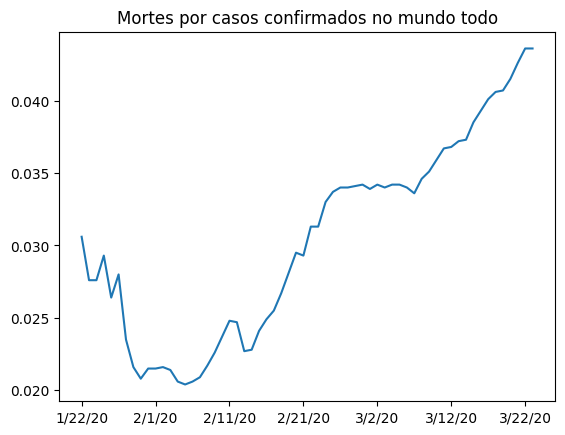

In [93]:
grouped_per_day.letality_rate_1.plot()
plt.title('Mortes por casos confirmados no mundo todo')
plt.show()

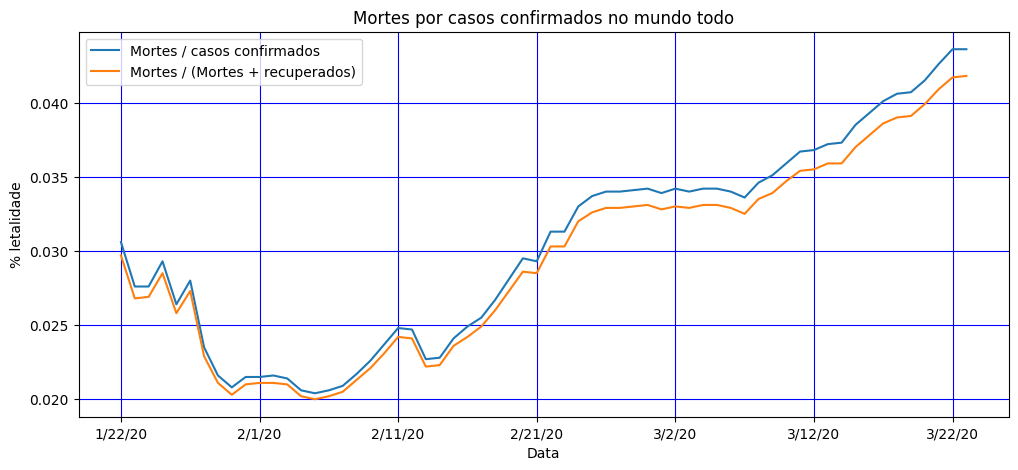

In [103]:
plt.figure(figsize = (12,5))
grouped_per_day.letality_rate_1.plot()
ax = grouped_per_day.letality_rate_2.plot()
plt.title('Mortes por casos confirmados no mundo todo')
plt.legend(['Mortes / casos confirmados', 'Mortes / (Mortes + recuperados)'])
plt.grid(color ='b', linestyle= '-' )
ax.set_xlabel('Fonte: https://www.cevs.rs.gov.br/informativos-epidemiologicos-2019')
ax.set_ylabel('% letalidade')
plt.show()